# Проект: Исследование стартапов

- Автор: Глотова Виктория
- Дата: март 2025

## Введение

Исследование проводится для финансовой компании, предоставляющей льготные займы стартапам и планирующей выход на инвестиционный рынок с целью покупки, развития и дальнейшей перепродажи перспективных стартапов.

### Цели и задачи проекта

**Основная цель проекта** - провести исследовательский предоставленных исторических данных, оценить их полноту и корретность, а также по возможности выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Задачи проекта:**
* загрузить данные и познакомиться с их содержимым;
* провести предобработку данных, проверить на наличие ошибок, при необходимости - устранить их;
* определить данные, которые необходимы для проведения исследовательского анализа;
* провести исследовательский анализ данных, проанализировать корреляцию факторов, влияющих на успешность стартапа;
* сформулировать выводы и рекомендации на основе проведенного анализа.

### Описание данных

Данные предоставлены в семи датасетах (5 основных и 2 дополнительных). Информация с описанием структуры данных скрыта в соответствии с положением о неразглашении.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Загрузим необходимые для работы библиотеки и данные.

In [8]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3

Defaulting to user installation because normal site-packages is not writeable


Загрузим имеющиеся данные.

### Вывод общей информации, исправление названия столбцов

Последовательно выведем информацию о каждом датафрейме и его первые строки, проверим содержание.

In [11]:
# Выводим информацию о датафрейме acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [12]:
# Выводим первые строки датафрейма acquisition_df на экран
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет `acquisition_df` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют единый стиль написания snake case и не требуют обработки.
- Для столбцов `id`, `acquiring_company_id` и `acquired_company_id` можно понизить разрядность для оптимизации работы, однако это не повлияет на ход исследования, поэтому шаг не является обязательным.
- Тип данных столбца `acquired_at` изменить на datetime64 для корректного анализа дат сделки.
- Пропуски содержатся в столбцах `term_code` и `acquired_at`, отсутствует информация о варианте расчета сделки и дате сделки. Возможно, часть сделок  еще не завершена, или информация о них не сохранена в системе. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `company_df`.

In [14]:
# Выводим информацию о датафрейме company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [15]:
# Выводим первые строки датафрейма company_df на экран
pd.set_option('display.max_columns', 500)
company_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Датасет `company_df` содержит 22 столбца и 217774 строк, в которых содержится информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов необходимо привести к единому стилю snake case и очистить от лишних пробелов.
- Пропуски содержатся во всех столбцах, включая столбец с ID компании. Это объясняет, почему все числовые столбцы имеют тип данных float64. Необходимо будет подробно их проанализировать и принять решение об их дальнейшей обработке.
- Одинаковые повторяющиеся значения количества ненулевых строк некоторых столбцов (217472, 52928) могут говорить о том, что датасет состоит из объединенных данных (возможно, объединение по типу full join). Об этом же свидетельствует наличие двух столбцов с информацией об ID компании. 
- Для столбцов `founded  at`, `closed  at` и `funded at` - изменить тип данных на datetime64.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Каждая строка содержит информацию от отдельном раунде инвестирования.

Исправим названия столбцов, приведя их к единому стилю. Используем метод replace() и заменим все пробелы на нижнее подчеркивание, но перед этим изменим название второго столбца с ID компании, чтобы избежать путаницы в дальнейшем:

In [17]:
company_df = company_df.rename(columns={'company  id': 'company_id_2'})
company_df.columns = company_df.columns.str.lower().str.replace(r'\s+', '_', regex=True)

In [18]:
display(company_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Перейдем к данным датасета `people_df`.

In [20]:
# Выводим информацию о датафрейме people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [21]:
# Выводим первые строки датафрейма people_df на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет `people_df` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках стартапов.

Первичный анализ показал:
- Названия столбцов имеют единый стиль написания snake case и не требуют обработки.
- В столбце `company_id` содержатся пропуски, отсюда тип данных float64. После обработки пропусков можно изменить тип данных на int64 с понижением разрядности. Для столбца `id` разрядность также можно понизить, однако существенно на исследование это не повлияет, и этот шаг можно пропустить.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Проверим данные датасета `education_df`.

In [23]:
# Выводим информацию о датафрейме education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [24]:
# Выводим первые строки датафрейма education_df на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет `education_df` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников стартапов. При необходимости информацию можно объединить с датафреймом people_df по ключам `person_id`(в education_df) и id (в people_df).

Первичный анализ показал:
- Названия столбцов имеют единый стиль написания snake case и не требуют обработки.
- Для столбца `graduated_at` необходимо изменить тип данных на datetime64.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Проверим данные последнего основного датасета `degrees_df`.

In [26]:
# Выводим информацию о датафрейме degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [27]:
# Выводим первые строки датафрейма degrees_df на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет `degrees_df` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудников стартапов. Для более полного исследования при необходимости информацию можно объединить с датафреймами `people_df` и `education_df`, но для этого необходимо будет изменить данные в столбце `object_id`, а именно отсечь первые 2 символа (p:), чтобы привести ключи в соответствие.

Первичный анализ показал:
- Названия столбцов имеют единый стиль написания snake case и не требуют обработки.
- Для столбца `object_id` нужно изменить тип данных на int64 (после обработки и извлечения числового ключа).
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Остались 2 дополнительных датафрейма, `fund_df` и `investment_df`, проверим информацию в них.

In [29]:
# Выводим информацию о датафрейме fund_df
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [30]:
# Выводим первые строки датафрейма fund_df на экран
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [31]:
# Выводим информацию о датафрейме investment_df
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [32]:
# Выводим первые строки датафрейма investment_df на экран
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Датасет `fund_df` содержит 9 столбцов (в описании данных обозначены 10 столбцов, отсутствует `category_code`) и 11652 строки, в которых представлена информация об инвестиционных фондах. Датасет `investment_df` содержит 4 столбца и 61403 строки с информацией о раундах инвестирования.

Первичный анализ показал:
- Названия столбцов обоих датасетов имеют единый стиль написания snake case и не требуют обработки.
- Информация о фондах неполная, есть пропуски в столбцах с описанием фонда, а датасет с раундами инвестирования пропусков не содержит.
- Осуществлять серьезную предобработку этих датасетов в рамках данного исследования нет необходимости. Для всех столбцов датасета `investment_df` при необходимости можно понизить разрядность. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию, датасеты могут быть объединены друг с другом и, при необходимости, присоединены к данным о компаниях-стартапах. 

### 1.2. Смена типов и анализ пропусков

Перейдем к обработке типов данных в каждой из таблиц. Перед обработкой будем сохранять копию таблицы, чтобы иметь возможность свериться с исходными данными, если это потребуется в дальнейшем.

In [35]:
# создаем копию датасета до преобразования
temp_1 = acquisition_df.copy() 
len(temp_1)

9407

In [36]:
# изменим тип данных в столбце с датой
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
# проверим изменения
acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

Тип данных столбца с датой изменен.

In [38]:
# создаем копию датасета company_df до преобразования
temp_2 = company_df.copy() 
len(temp_2)

217774

In [39]:
# изменим тип данных в столбцах с датой
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'], errors='coerce')
company_df['closed_at'] = pd.to_datetime(company_df['closed_at'], errors='coerce')
company_df['funded_at'] = pd.to_datetime(company_df['funded_at'], errors='coerce')
# проверим изменения
company_df[['founded_at','closed_at','funded_at']].dtypes

founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object

Обработаем типы данных в остальных основных датасетах.

In [41]:
# создаем копию датасета people_df до преобразования
temp_3 = people_df.copy() 
len(temp_3)

226709

In [42]:
# создаем копию датасета education_df до преобразования
temp_4 = education_df.copy() 
len(temp_4)

109610

In [43]:
# создаем копию датасета degrees_df до преобразования
temp_5 = degrees_df.copy() 
len(temp_5)

109610

In [44]:
# изменим тип данных в столбцe с датой
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

# проверим изменения
education_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

Перейдем к обработке пропусков. Для каждой таблице выведем на экран информацию о количестве и доле пропусков.

In [46]:
missing_acq = (pd.DataFrame({'Кол-во пропусков': acquisition_df.isnull().sum(), 'Доля пропусков': acquisition_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных acquisition_df')
display (missing_acq)

'Пропуски в данных acquisition_df'

,Кол-во пропусков,Доля пропусков
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
term_code,7576,0.805400
price_amount,0,0.000000
acquired_at,29,0.003100


80.5% данных о вариантах рассчетов отстутствует. Однако эта информация не потребуется для ответов на вопросы нашего исследования, поэтому можно оставить пропуски без обработки. Пропуски в столбце `acquired_at` - менее 1%, что не критично, их также можно оставить как есть.

In [48]:
missing_people = (pd.DataFrame({'Кол-во пропусков': people_df.isnull().sum(), 'Доля пропусков': people_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных people_df')
display (missing_people)

'Пропуски в данных people_df'

,Кол-во пропусков,Доля пропусков
id,0,0.000000
first_name,9,0.000000
last_name,4,0.000000
company_id,192094,0.847300
network_username,187842,0.828600


84.7% пропусков содержится в данных идентификатора компании, а также отсутствует 82.8% данных о никах в соцсетях. Это может стать проблемой при попытке объединить этот датасет с информацией о компании, в которой работает сотрудник. Однако, для решения текущих вопросов этого не требуется, поэтому пропуски можно оставить без изменений.

In [50]:
missing_edu = (pd.DataFrame({'Кол-во пропусков': education_df.isnull().sum(), 'Доля пропусков': education_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных education_df')
display (missing_edu)

'Пропуски в данных education_df'

,Кол-во пропусков,Доля пропусков
id,0,0.000000
person_id,0,0.000000
instituition,55,0.000500
graduated_at,51556,0.470400


47% пропусков - в информации о дате получения образования. Для ответов на вопросы исследования эти пропуски также неинформативны, оставляем без обработки.

In [52]:
missing_degr = (pd.DataFrame({'Кол-во пропусков': degrees_df.isnull().sum(), 'Доля пропусков': degrees_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных degrees_df')
display (missing_degr)

'Пропуски в данных degrees_df'

,Кол-во пропусков,Доля пропусков
id,0,0.000000
object_id,0,0.000000
degree_type,11221,0.102400
subject,28312,0.258300


Отсутствует 25.8% данных о специальности сотрудников и 10.2% - о типе образования. Заменить эти значения на какие-либо рассчетные и "заглушку" не получится, не имеет смысла, поэтому также оставляем без обработки.

In [54]:
missing_company = (pd.DataFrame({'Кол-во пропусков': company_df.isnull().sum(), 'Доля пропусков': company_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных company_df')
display (missing_company)

'Пропуски в данных company_df'

,Кол-во пропусков,Доля пропусков
company_id,302,0.001400
name,303,0.001400
category_code,73888,0.339300
status,302,0.001400
founded_at,107818,0.495100
closed_at,214325,0.984200
domain,70615,0.324300
network_username,122240,0.561300
country_code,109167,0.501300
investment_rounds,302,0.001400


Как мы уже видели ранее, пропуски содержатся во всех данных. 98.4% пропущенных значений в дате закрытия компаний вероятнее всего свидетельствует о том, что более 98% стартапов не закрылись и продолжают работать. В столбце `founded_at` пропущено 49.5% значений, в столбцах `network_username` и `country_code` - 56% и 50% соответственно. Это общие данные о компаниях-стартапах, которые не должны повлиять на ход исследования и помешать ответам на вопросы заказчика. Пока оставим эти пропуски без изменений.

Для анализа информации о компаниях-стартапах ключевыми будут являться столбцы с названием и ID компании, а также информация об общем количестве раундов инвестирования и общей сумме финансирования. В этих столбцах меньше всего пропусков (менее 1 %). Замена пропущенных значений в датасете может исказить данные, поэтому пока оставим их без обработки.

Данные, начиная со столбца `funding_round_id`, которые, вероятно, ранее являлись отдельным датасетом, имеют примерно одинаковое количество пропусков, и их пока также оставим без изменений.	

Построим матрицу корреляции пропусков, чтобы оценить их связь.

<Axes: >

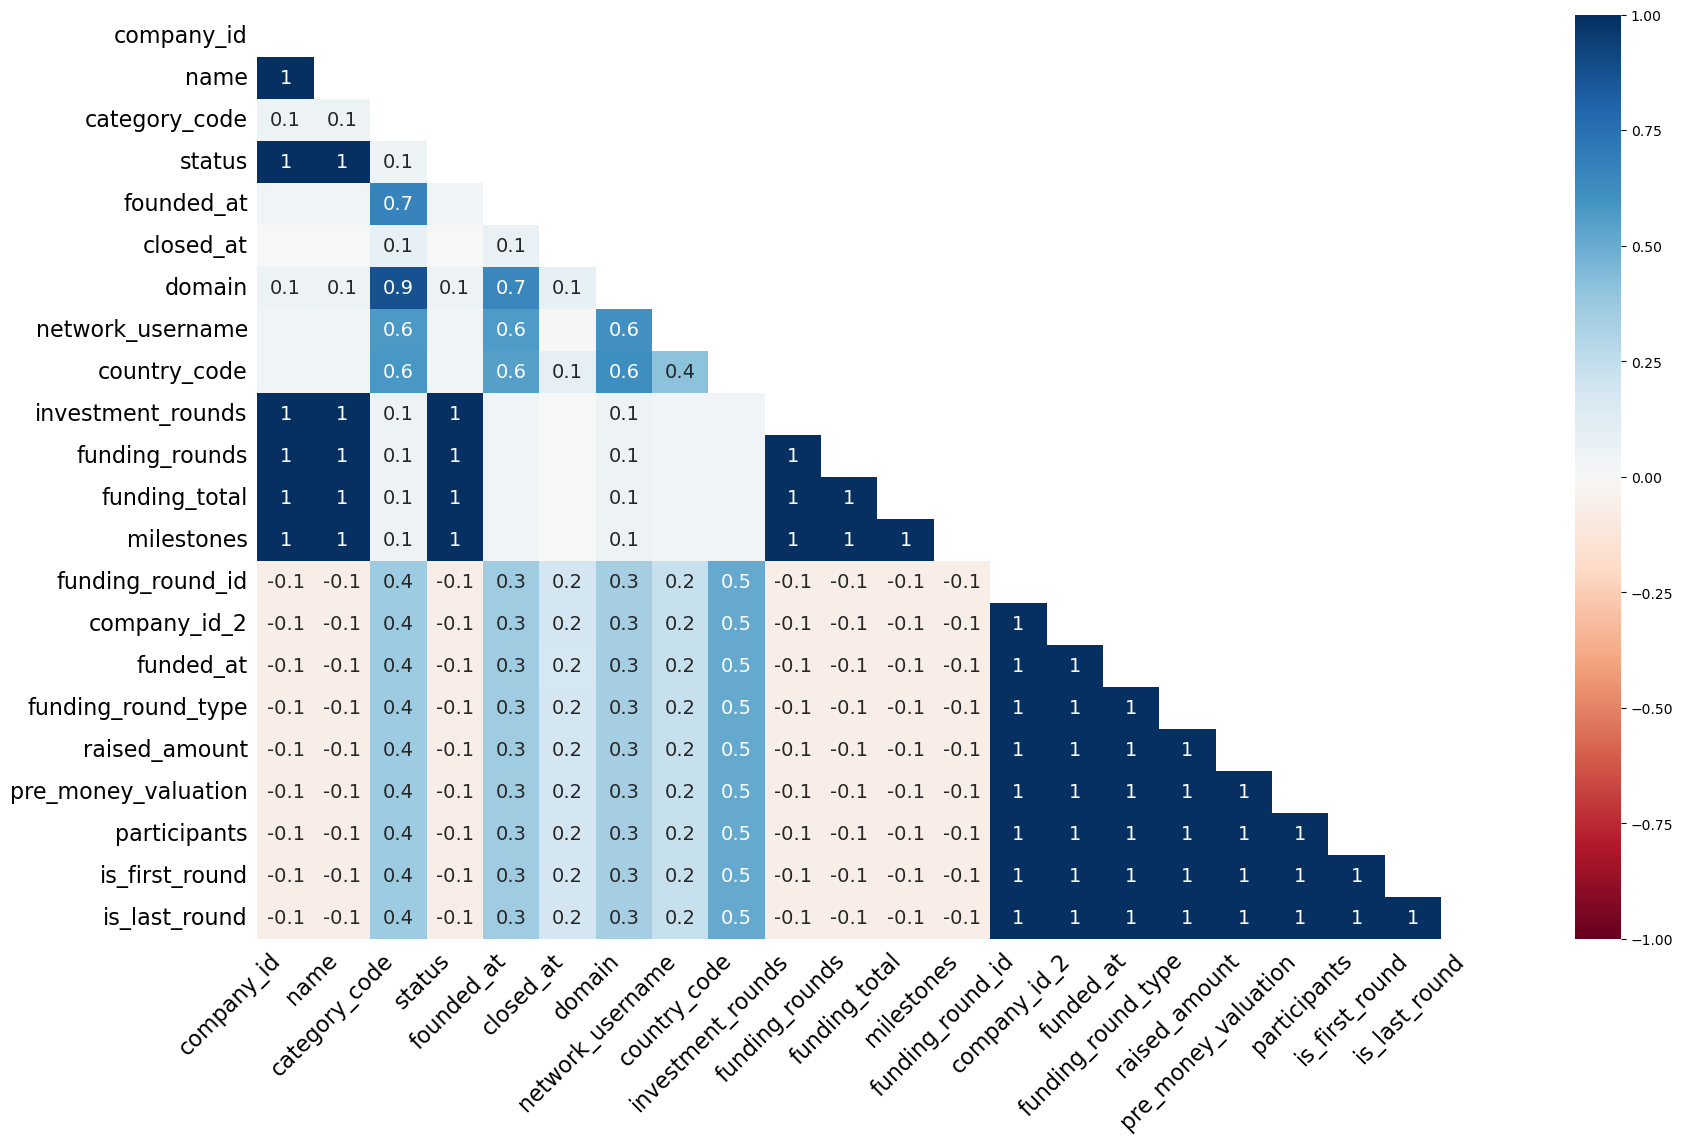

In [56]:
msno.heatmap(company_df)

Как видно из корреляционной матрицы пропусков, сильная корреляция наблюдается между столбцами `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`. Она равна 1, что говорит о том, что все 302 пропуска присутствуют в одинаковых строках и в последующем могут быть удалены как неинформативные.

Также сильную корреляцию можно увидеть между пропусками в последних столбцах (начиная с `funding_round_id`), что подтверждает нашу гипотезу о том, что датасет собран из двух.

Проверим, можем ли мы получить часть информации об ID компании из столбца `company_id_2`. Для этого напишем функцию, которая проверит, можно ли сделать замены.	

In [59]:
#заменим пропуски в данных ID компании информацией из столбца company_id_2, если там присутствует значение

def id_company_null (row):
    if pd.isna(row['company_id']):
        return row['company_id_2'] 
    else:
        return row['company_id']
company_df['company_id'] = company_df.apply(id_company_null, axis = 1)

In [60]:
#проверим, остались ли пропуски в данных ID компании
company_df['company_id'].isna().sum()

0

Пропусков в столбце `company_id` не осталось, можно изменить в нем тип данных на integer, чтобы в дальнейшем иметь возможность объединить этот датасет с другими, если это понадобится.

In [62]:
company_df['company_id'] = company_df['company_id'].astype('int64')
company_df['company_id'].dtypes

dtype('int64')

В ходе загрузки и первичной предобработки данных было проанализировано общее содержание представленных датасетов. Тип данных столбцов с датой приведен к типу datetime. Добавлена недостающая информация по ID компании. В рамках анализа пропусков строки не удалялись и значения не заменялись (кроме ID компании в `company_df`).

На начальном этапе данных для предварительного исследования достаточно. Перейдем к решению задач проекта.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Для анализа раундов финансирования по годам добавим в датафрейм `company_df` дополнительный столбец, в котором выделим год из столбца `funded_at`.

In [67]:
company_df['funded_at_year'] = company_df['funded_at'].dt.year

In [68]:
# проверим данные
company_df['funded_at_year'].head()

0    2005.0
1    2007.0
2    2008.0
3       NaN
4       NaN
Name: funded_at_year, dtype: float64

Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года укажем:
- типичный размер средств, выделяемый в рамках одного раунда (медиану);
- общее количество раундов финансирования за этот год.

Отфильтруем таблицу, оставив информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [70]:
pd.options.display.float_format = '{:.2f}'.format
pivot_years = pd.pivot_table(company_df, index = 'funded_at_year', values = 'raised_amount',
                             aggfunc = ['median', 'count'])

#переименуем столбцы и отфильтруем таблицу
pivot_years.columns = ['median_raised_amount', 'count_raised_amount']
pivot_years_filtered = pivot_years[pivot_years['count_raised_amount'] > 50]

display (pivot_years_filtered)

,median_raised_amount,count_raised_amount
funded_at_year,,
1999.00,2000000.00,76
2000.00,4200000.00,125
2001.00,3000000.00,96
2002.00,4200000.00,116
2003.00,3000000.00,159
2004.00,5000000.00,291
2005.00,5500000.00,1633
2006.00,5000000.00,2436
2007.00,3973320.00,3279


Сбросим индексы у сводной таблицы, разделим средние показатели на 1 млн для более наглядного отображения и построим визуализацию, где столбцами будут средние суммы инвестирования, а на линейном графике отразим общее количество раундов инвестирования за год.

In [72]:
#сбросим индексы
pivot_years_filtered = pivot_years_filtered.reset_index()

# добавим доп.столбец для понятной визуализации
pivot_years_filtered['median_amount_mln'] = round(pivot_years_filtered['median_raised_amount'] / 1000000, 3)
# приведем год к типу integer для корректного отображения
pivot_years_filtered['funded_at_year'] = pivot_years_filtered['funded_at_year'].astype('int64')

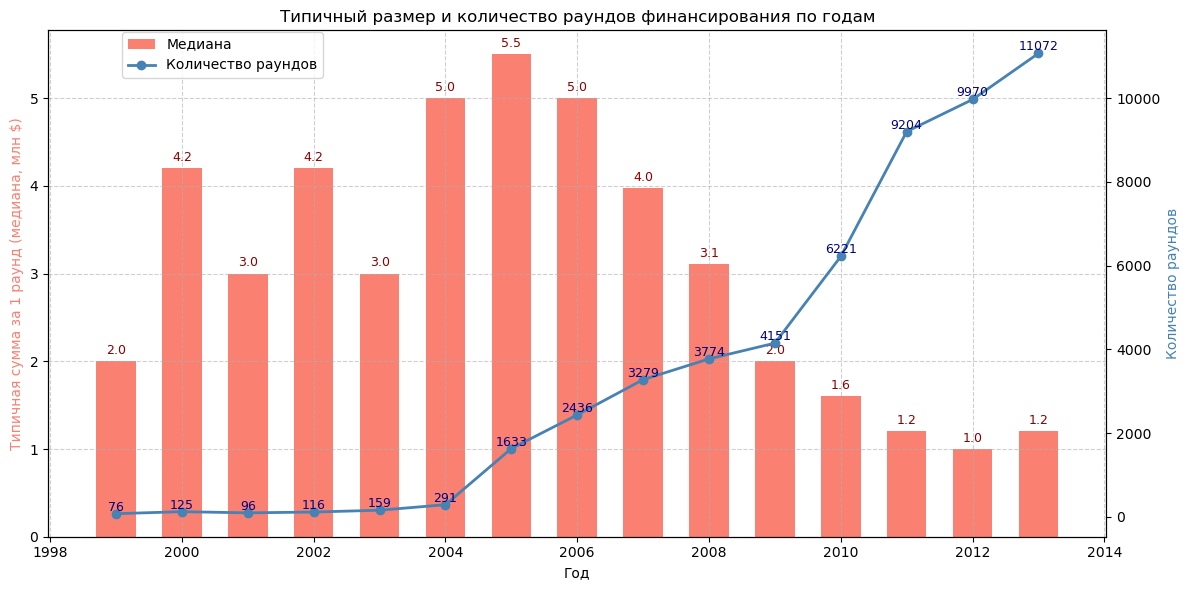

In [73]:
# создаём фигуру и оси
fig, ax1 = plt.subplots(figsize=(12, 6))

# столбчатая диаграмма
bars = ax1.bar(pivot_years_filtered['funded_at_year'],
    pivot_years_filtered['median_amount_mln'],
    color='salmon',
    label='Медиана',
    width=0.6)

ax1.set_xlabel('Год')
ax1.set_ylabel('Типичная сумма за 1 раунд (медиана, млн $)', color='salmon')
ax1.set_title('Типичный размер и количество раундов финансирования по годам')
ax1.grid(True, linestyle='--', alpha=0.6)

# Добавим подписи над столбиками
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # смещение подписи вверх
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=9, color='darkred')
    
# Вторая ось Y — линейный график
ax2 = ax1.twinx()
line = ax2.plot(pivot_years_filtered['funded_at_year'],
    pivot_years_filtered['count_raised_amount'],
    color='steelblue',
    marker='o',
    linewidth=2,
    label='Количество раундов')

ax2.set_ylabel('Количество раундов', color='steelblue')

# Добавим подписи к точкам линии
for x, y in zip(pivot_years_filtered['funded_at_year'], pivot_years_filtered['count_raised_amount']):
    ax2.text(x, y, f'{y}', fontsize=9, color='navy', ha='center', verticalalignment='bottom')

# Общая легенда
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))

plt.tight_layout()
plt.show()

In [74]:
#найдем среднее значение типичного размера финансирования за период с 1999 по 2013 гг
pivot_years_filtered['median_raised_amount'].mean()

3065721.3333333335

В 2005 году типичный размер собранных в рамках одного раунда средств финансирования был максимален и составил 5.5 млн.долларов. Минимальный уровень размера финансирования 1 раунда наблюдался в 2012 году и составил 1 млн.долларов. На протяжении исследуемого периоду с 1999 по 2013 год число раундов финансирования растет, к 2013 году достигнув максимального значения в 11072 раунда финансирования. При этом, начиная с 2005 на фоне резкого роста числа раундов финансирования наблюдается снижение сумм, собранных в рамках одного раунда. Это может сигнализировать о появлении большого количества мелких стартапов, которые финансируются небольшими суммами. 


### 2.2. Люди и их образование

Для анализа сведений о сотрудниках объединим три датасета `people.csv`, `education.csv` и `degrees.csv`. Для этого преобразуем столбец с ID сотрудника в таблице `degrees.csv`.

In [77]:
# Функция для извлечения id сотрудника
def extract_id (text):
    if "p:" not in text:
        return text
    else:  
        return text.replace("p:", "").strip() #Очищаем данные от текста и пробелов

degrees_df['object_id'] = degrees_df['object_id'].apply(extract_id)
degrees_df['object_id'] = degrees_df['object_id'].astype('int64')

#Проверим получившиеся данные
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [78]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  int64 
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Данные очищены. Перед объединением таблиц переименуем названия столбцов, содержащие идентификатор записи об образовании и идентификатор записи об ученой степени, чтобы избежать путаницы в дальнейшем.

In [80]:
education_df = education_df.rename(columns = {'id':'edu_id'})
degrees_df = degrees_df.rename(columns = {'id':'degree_id'})

In [81]:
df = people_df.merge(education_df, left_on = 'id', right_on = 'person_id', how = 'left')
df = df.merge(degrees_df, left_on = 'id', right_on = 'object_id', how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370836 entries, 0 to 370835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                370836 non-null  int64         
 1   first_name        370827 non-null  object        
 2   last_name         370832 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   edu_id            212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   degree_id         212198 non-null  float64       
 10  object_id         212198 non-null  float64       
 11  degree_type       190719 non-null  object        
 12  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [82]:
df.head(10)

,id,first_name,last_name,company_id,network_username,edu_id,person_id,instituition,graduated_at,degree_id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.00,NaN,2415.00,10.00,Harvard University,NaT,2415.00,10.00,NaN,Computer Science
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.00,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6,100006,Courtney,Homer,81558.00,jobsbostontech,83604.00,100006.00,MIT Sloan School of Management,2004-01-01,83604.00,100006.00,MBA,Strategy & Marketing
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Полученный датафрейм содержит большее количество строк, чем изначальный `people_df`, что говорит о наличии у части сотрудников нескольких записей об образовании и ученой степени. Для оценки количества сотрудников с образованием и без него, создадим новый датафрейм, не содержащий дубликатов id сотрудников + id компании (т.к. один и тот же сотрудник мог работать в разных компаниях).

In [84]:
# Проверим наличие дубликатов
df.duplicated(subset = ['id','company_id']).sum()

144127

In [85]:
# Создадим новый датафрейм без дубликатов
df_unique = df.drop_duplicates(subset = ['id','company_id']).copy()
count_after_cleaned = len(df_unique)
display (f'Осталось строк после удаления дубликатов - {count_after_cleaned}.')

'Осталось строк после удаления дубликатов - 226709.'

Число строк очищенного датафрейма соотвествует числу строк `people_df`. Проверим, зависит ли полнота сведений об образовании сотрудников от размера компании. Введем дополнительный столбец с признаком наличия образования (1 - есть сведения, 0 - нет сведений).

In [87]:
df_unique['edu']= df['edu_id'].notna().astype(int)

Сгруппируем данные по компаниям, где рассчитаем количество сотрудников, количество данных о наличии образования и долю отсутствия этих данных от общего числа сотрудников.

In [89]:
companies = df_unique.groupby('company_id')['edu'].agg(['count', 'sum']).sort_values(by = 'count', ascending = False)
companies['share'] = round(1 - (companies['sum'] / companies['count']), 3)
companies.columns = ['count_people', 'with_education', 'share_null_education']
companies = companies.reset_index()
display (companies)

,company_id,count_people,with_education,share_null_education
0,59.00,244,168,0.31
1,29.00,150,110,0.27
2,1242.00,138,101,0.27
3,231067.00,72,58,0.19
4,499.00,63,43,0.32
...,...,...,...,...
22917,63585.00,1,0,1.00
22918,7258.00,1,1,0.00
22919,63581.00,1,0,1.00
22920,63580.00,1,1,0.00


Чтобы понять, как разделить все компании на группы по количеству сотрудников, выведем уникальные значения столбца `count_people` и посчитаем, как часто втречается значение:

In [91]:
companies['count_people'].value_counts()

count_people
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
20         3
15         3
23         3
18         3
19         3
21         2
25         2
29         2
56         2
22         2
150        1
48         1
138        1
72         1
63         1
61         1
51         1
39         1
47         1
36         1
35         1
32         1
31         1
26         1
244        1
Name: count, dtype: int64

Из 22922 компаний 18117 - это компании, в штате которых один сотрудник, их можно выделить в отдельную категорию, где основатель стартапа работает самостоятельно. Выделим следующие группы (включая верхнюю границу):
- 1 сотрудник (основатель стартапа),
- от 2 до 5 сотрудников (небольшая проектная команда),
- от 6 до 20 сотрудников (средняя команда, появляется иерархия и выделяются направления деятельности),
- от 21 до 50 сотрудников (стартап на этапе расширения, привлекаются дополнительные специалисты для развития бизнеса),
- от 50 до 100 сотрудников (этап роста, когда требуется структурирование ресурсов и управления).
- от 101 и более (большие команды).

In [93]:
companies['category'] = pd.cut(companies['count_people'], 
                               bins = [0, 1, 5, 20, 50, 100, float('inf')], 
                               labels =['1 сотрудник', '2-5 сотрудников', '6-20 сотрудников', '21-50 сотрудников', '51-100 сотрудников', 'более 100'])

In [94]:
grouped_companies = companies.groupby('category', observed=False)['share_null_education'].mean().reset_index()
grouped_companies.index += 1
display(grouped_companies)

,category,share_null_education
1,1 сотрудник,0.46
2,2-5 сотрудников,0.48
3,6-20 сотрудников,0.52
4,21-50 сотрудников,0.34
5,51-100 сотрудников,0.29
6,более 100,0.28


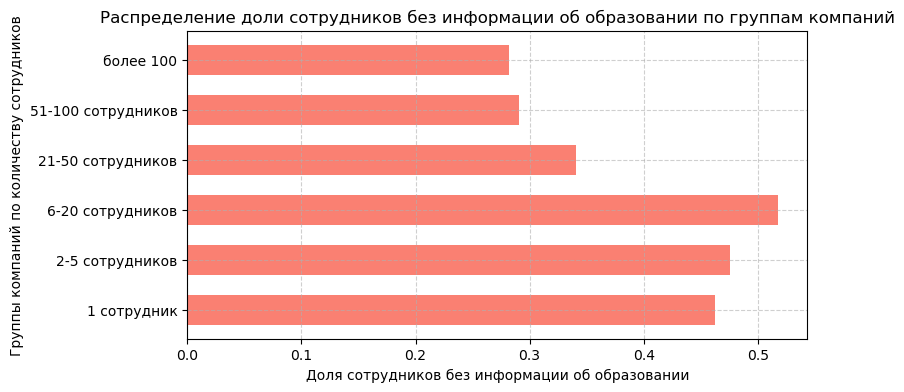

In [95]:
# Построим визуализацию на полученных данных
plt.figure(figsize=(8, 4))

# Строим гистограмму
plt.barh(grouped_companies['category'], grouped_companies['share_null_education'], color='salmon', height=0.6)

# Настраиваем оформление графика
plt.title('Распределение доли сотрудников без информации об образовании по группам компаний')
plt.xlabel('Доля сотрудников без информации об образовании')
plt.ylabel('Группы компаний по количеству сотрудников')
# Добавляем сетку графика
plt.grid(True, linestyle='--', alpha=0.6)

# Выводим график
plt.show()

В компаниях, где работает более 100 сотрудников, выявлена наименьшая доля отсутствующих записей об образовании - 0.28. При этом наблюдается снижение доли отсутствующей информации в компаниях, где работает более 20 человек. Это может объясняться тем, что с ростом компании внутри нее появляется больше документов, регламентирующих ее работу и в целом появляется необходимость структурировать сбор и хранение информации, чтобы обеспечить ее эффективное управление.

### 2.3. Объединять или не объединять — вот в чём вопрос

Столбец с названием `network_username` встречается в 3 датасетах - `company_df`, `people_df` и `fund_df`. При первичном знакомстве с данными было выявлено, что в таблице `company_df` в интересующем нас столбце отсутствует 56.1% данных (всего строк - 217 774), в таблице `people_df` отсутствует 82.9% данных (всего строк - 226 709).
Проверим долю пропусков в таблице `fund_df`.

In [98]:
fund_df['network_username'].isna().sum() / fund_df.shape[0]

0.8155681428081016

В таблице `fund_df` отсутствует 81.6% данных в столбце `network_username` (всего строк - 11 652). Большое количество отсутствующих значений говорит о том, что данный столбец нельзя использовать в качестве основного ключа для объединения таблиц. 

Проверим уникальные значения в каждой таблице, исключив пропуски, и найдем пересечения, если они есть.

In [100]:
net_comp = set (company_df['network_username'].dropna().unique())
net_peop = set (people_df['network_username'].dropna().unique()) 
net_fund = set (fund_df['network_username'].dropna().unique())

In [101]:
intersection_1 = net_comp.intersection(net_peop)
intersection_2 = net_comp.intersection(net_fund)
intersection_3 = net_peop.intersection(net_fund)

In [102]:
display (f'Совпадающих значений между company_df и people_df: {len(intersection_1)}')
display (f'Совпадающих значений между company_df и fund_df: {len(intersection_2)}')
display (f'Совпадающих значений между people_df и fund_df: {len(intersection_3)}')

'Совпадающих значений между company_df и people_df: 2199'

'Совпадающих значений между company_df и fund_df: 70'

'Совпадающих значений между people_df и fund_df: 79'

In [103]:
#выведем примеры совпадающих значений
display(list(intersection_1)[:5])
display(list(intersection_2)[:5])
display(list(intersection_3)[:5])

['dradept', 'PlanetXCafe', 'jocke', '1stpageseouk', 'ebkcd2']

['creditsuisse', 'atlassian', 'angellist', 'zestfinance', 'nyuniversity']

['larshinrichs', 'csertoglu', 'burrillandco', 'jtriest', 'boonseo']

Между датасетами присутствуют пересечения по столбцам `network_username`, но их количество незначительное, чтобы использовать данный столбец в качестве ключа для объединения данных.

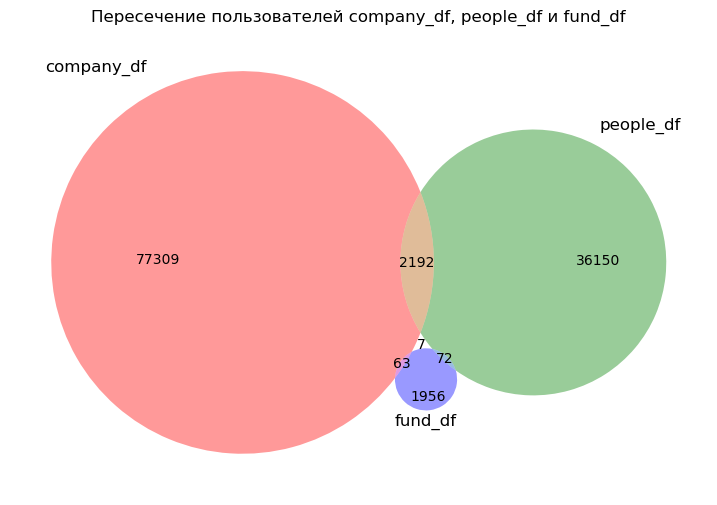

In [105]:
# создадим контейнер
plt.figure(figsize=(9, 7))

# Строим диаграмму Венна
venn3([net_comp, net_peop, net_fund], set_labels=('company_df', 'people_df', 'fund_df'))

# Отображаем график
plt.title("Пересечение пользователей company_df, people_df и fund_df")
plt.show() 


### 2.4. Проблемный датасет и причина возникновения пропусков

В ходе первичного знакомства с данными датасета `company_and_rounds.csv` было выявлено, что каждая строка данных содержит информацию о раунде инвестирования. Соответственно часть данных с описанием компании дублируется и это затрудняет быстрый анализ информации. Также в ходе с знакомства с данными было выявлено, что датасет `company_and_rounds.csv` представляет собой некую объединенную таблицу из двух датасетов. Это подтверждает гипотезу заказчика о том, что ранее эти данные хранились иначе. Для удобства дальнейшей работы выделим отдельный датафрейм `new_df`, который будет содержать только столбцы с информацией о компаниях, общем количестве раундов инвестирования и общей сумме инвестирования.

In [107]:
new_df = company_df[['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 
'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]

In [108]:
# проверим получившийся датафрейм
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217774 non-null  int64         
 1   name               217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), 

In [109]:
new_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,39750000.00,5.00
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00


Даже первичный анализ получившегося датафрейма говорит о наличии в нем строк-дубликатов. В исходном датасете каждый раунд инвестирования был записан отдельной строкой, поэтому информация о компании в этих строках дублировалась. Проверим данные на дубликаты и удалим их.

In [111]:
new_df.duplicated().sum()

20989

In [112]:
df_lines = new_df.shape[0] #сохраняем количество строк для дальнейших расчетов
new_df = new_df.drop_duplicates() #удаляем дубликаты
after_cleaned = len(new_df)
count_cleaned = df_lines - after_cleaned #считаем количество удаленных строк
cleaned_share = round(count_cleaned / df_lines * 100, 4) #считаем долю удаленных строк

display(f'Удалено строк - {count_cleaned} ({cleaned_share}%)')


'Удалено строк - 20989 (9.638%)'

Проверим оставшиеся данные на пропуски и решим, можно ли их оптимизировать для дальнейшей работы.

In [114]:
missing = (pd.DataFrame({'Кол-во пропусков': new_df.isnull().sum(), 'Доля пропусков': new_df.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных new_df')
display (missing)

'Пропуски в данных new_df'

,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,233,0.001200
category_code,73599,0.374000
status,232,0.001200
founded_at,105558,0.536400
closed_at,194165,0.986700
domain,70240,0.356900
network_username,116194,0.590500
country_code,108795,0.552900
investment_rounds,232,0.001200


Помешать анализу могут пропуски в названии компании (если придется углубляться до анализа конкретного ID компании, отсутствие данных по количеству раундов финансирования и суммам финансирования. Практически одинаковое количество пропусков в этих столбцах могут говорить о том, что если отсутствует информация о названии компании, то нет и всех остальных данных. В таком случае их можно удалить без потери качества данных, тем более что процент пропусков в них менее 1%. Проверим гипотезу, отфильтровав данные. 

In [116]:
df_sorted = new_df[new_df['name'].isna()]
df_sorted.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
6492,137018,NaN,NaN,closed,2009-01-01,2010-07-01,NaN,NaN,NaN,0.00,0.00,0.00,1.00
217472,1267,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217473,558,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217474,746,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217475,748,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
missing_sorted = (pd.DataFrame({'Кол-во пропусков': df_sorted.isnull().sum(), 'Доля пропусков': df_sorted.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
display (f'Пропуски в данных df_sorted')
display (missing_sorted)

'Пропуски в данных df_sorted'

,Кол-во пропусков,Доля пропусков
company_id,0,0.000000
name,233,1.000000
category_code,233,1.000000
status,232,0.995700
founded_at,232,0.995700
closed_at,232,0.995700
domain,233,1.000000
network_username,233,1.000000
country_code,233,1.000000
investment_rounds,232,0.995700


Наша гипотеза подтвердилась, удалим строки с отсутствующими данными.

In [119]:
new_df = new_df[new_df['name'].notna()]
after_cleaned_2 = len(new_df)
count_cleaned_2 = after_cleaned - after_cleaned_2 
cleaned_share_2 = round(count_cleaned_2 / df_lines * 100, 4) #считаем долю удаленных строк

display(f'Удалено строк - {count_cleaned_2} ({cleaned_share_2}%)')

'Удалено строк - 233 (0.107%)'

In [120]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196552 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196552 non-null  int64         
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196552 non-null  object        
 4   founded_at         91226 non-null   datetime64[ns]
 5   closed_at          2619 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196552 non-null  float64       
 10  funding_rounds     196552 non-null  float64       
 11  funding_total      196552 non-null  float64       
 12  milestones         196552 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), objec

Дополнительно можем изменить тип числовых данных на integer:

In [122]:
for column in ['investment_rounds','funding_rounds', 'funding_total','milestones']:
    new_df[column] = new_df[column].astype(int)

print(new_df.dtypes)

company_id                    int64
name                         object
category_code                object
status                       object
founded_at           datetime64[ns]
closed_at            datetime64[ns]
domain                       object
network_username             object
country_code                 object
investment_rounds             int32
funding_rounds                int32
funding_total                 int32
milestones                    int32
dtype: object


Таблица для работы с информацией о компаниях `new_df` готова. Создадим аналогично отдельную таблицу с информацией об инвестиционных раундах `rounds_df`.

In [124]:
print(company_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'funded_at_year'],
      dtype='object')


In [125]:
rounds_df = company_df[['funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 
                        'is_first_round', 'is_last_round', 'funded_at_year']]

In [126]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_2         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 16.6+ MB


Удалим строки, в которых отсутствует информация об инвестиционных раундах компаний.

In [128]:
rounds_df = rounds_df[rounds_df['company_id_2'].notna()]
rounds_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id_2         52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   funded_at_year       52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Изменим тип числовых данных на integer.

In [130]:
for column in ['funding_round_id','company_id_2', 'raised_amount','pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']:
    rounds_df[column] = rounds_df[column].astype(int)

print(rounds_df.dtypes)

funding_round_id                int32
company_id_2                    int32
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                   int32
pre_money_valuation             int32
participants                    int32
is_first_round                  int32
is_last_round                   int32
funded_at_year                float64
dtype: object


Таким образом, датасет `company_and_rounds.csv` разделен для удобной работы на 2 таблицы:
- `new_df` - содержит информацию о компаниях-стартапах, общем количестве раундов финансирования и сумме финансирования. 
- `rounds_df` - содержит информацию о раундах финансирования.

Таблицы готовы для анализа и не требуют дополнительных предварительных действий.


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Для исследования заказчика интересуют компании, которые меняли или готовы менять владельцев. Отфильтруем датафрейм `new_df` по следующим условиям:

- значения `funding_rounds` больше нуля (компания получала финансирования),
- или значения `investment_rounds` больше нуля (компания сама финансировала другие стартапы),
- или компании, у которых в колонке `status` указано `acquired`(компания была приобретена другой компанией).

Затем присоединим к полученной таблице данные из `acquisition_df`.

In [134]:
new_df_filtered = new_df[(new_df['funding_rounds'] > 0) | 
                         (new_df['investment_rounds'] > 0) | 
                         (new_df['status'] == 'acquired')]

In [135]:
display (len(new_df_filtered))

40747

Данные отфильтрованы, новая таблица содержит 40747 строк, присоединим к ней данные из `acquisition_df`, используя ключ `acquired_company_id` (идентификатор покупаемой компании).

In [137]:
new_df_filtered = new_df_filtered.merge(acquisition_df, how = 'left', left_on = 'company_id', right_on = 'acquired_company_id')

Выведем на экран информацию о новой таблице и ее первые строки для проверки.

In [139]:
new_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  int32         
 10  funding_rounds        40890 non-null  int32         
 11  funding_total         40890 non-null  int32         
 12  milestones            40890 non-null  int32         
 13  id              

In [140]:
new_df_filtered.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,NaN,NaN,NaN,NaN,NaN,NaT
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,1.00,11.00,10.00,NaN,20000000.00,2007-05-30
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4,20.00,377.00,100.00,cash,0.00,2005-05-29
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30


После объединения количество строк новой таблицы выросло до 40890. Это означает, что в списке есть компании, которые меняли владельца более 1 раза.
Для удобства и наглядности дальнейшей работы добавим 2 дополнительных столбца, с суммой финансирования и суммой покупки, где разделим существующие цифры на 1 млн.


In [142]:
new_df_filtered['funding_total_mln'] = new_df_filtered['funding_total'] / 1000000
new_df_filtered['price_amount_mln'] = new_df_filtered['price_amount'] / 1000000

In [143]:
new_df_filtered.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,funding_total_mln,price_amount_mln
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5,NaN,NaN,NaN,NaN,NaN,NaT,39.75,NaN
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0,1.00,11.00,10.00,NaN,20000000.00,2007-05-30,0.00,20.00
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4,20.00,377.00,100.00,cash,0.00,2005-05-29,0.00,0.00
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3,1901.00,5.00,1001.00,cash_and_stock,47500000.00,2009-08-10,5.00,47.50
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4,3878.00,23054.00,10014.00,NaN,0.00,2010-09-30,0.00,0.00


Таблица готова для дальнейшего анализа.


### 3.2. Анализ выбросов

Рассмотрим обычный для данного периода размер средств, который предоставлялся компаниям в качестве финансирования.


In [146]:
new_df_filtered['funding_total_mln'].describe()

count   40890.00
mean        9.45
std        46.12
min     -2147.48
25%         0.00
50%         0.60
75%         5.62
max      1765.50
Name: funding_total_mln, dtype: float64

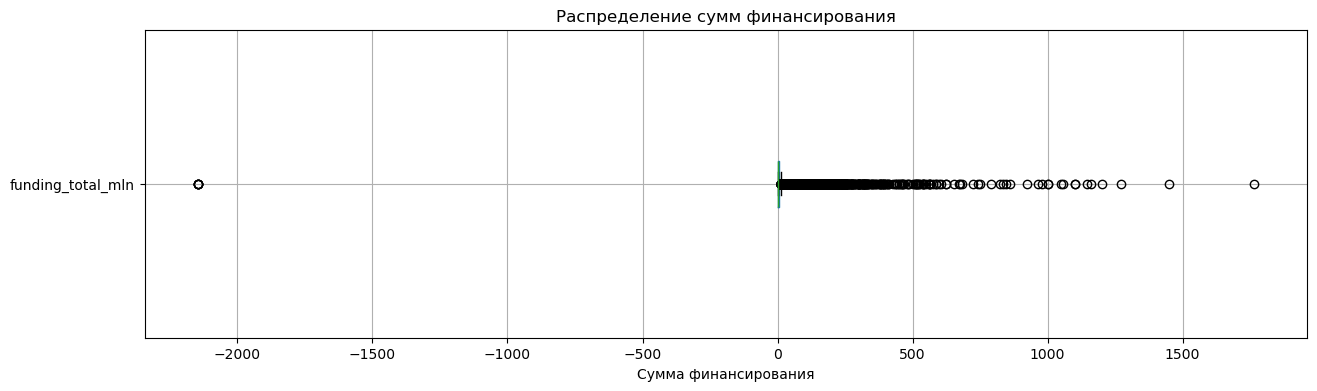

In [147]:
# Строим диаграмму размаха для наглядности
# Создаём фигуру графика
plt.figure(figsize=(15, 4))

# Строим диаграмму
boxplot = new_df_filtered.boxplot(column = 'funding_total_mln', 
                    vert = False)

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')

plt.show()

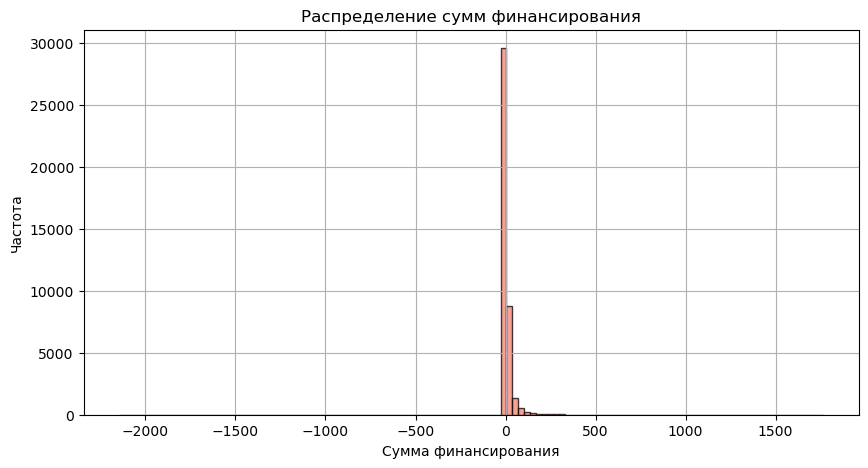

In [148]:
# Дополнительно строим диаграмму
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму
new_df_filtered['funding_total_mln'].plot(kind='hist', 
                bins=120, 
                alpha=0.75,
                color='salmon',
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Часть данных, содержащихся в столбце с суммами финансирования, имеет отрицательное значение и не позволяет корректно сформировать представление о типичном размере средств финансирования. Выведем на экран информацию о компаниях, имеющих отрицательные значения `funding_total`.

In [150]:
new_df_minus = new_df_filtered[(new_df_filtered['funding_total_mln'] < 0)]
display(len(new_df_minus))
display(new_df_minus.head())

5

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,funding_total_mln,price_amount_mln
1346,13219,Clearwire,mobile,acquired,2003-10-01,NaT,clearwire.com,NaN,USA,0,4,-2147483648,2,8023.00,3827.00,13219.00,NaN,0.00,2012-12-17,-2147.48,0.00
16503,242735,sigmacare,health,operating,2005-01-01,NaT,sigmacare.com,SigmaCareEHR,USA,0,1,-2147483648,0,NaN,NaN,NaN,NaN,NaN,NaT,-2147.48,NaN
30770,4843,"Verizon Communications, Inc.",mobile,ipo,NaT,NaT,verizon.com,NaN,USA,3,2,-2147483648,3,NaN,NaN,NaN,NaN,NaN,NaT,-2147.48,NaN
35571,64365,Carestream,biotech,operating,2007-01-01,NaT,carestream.com,carestream,USA,0,1,-2147483648,1,NaN,NaN,NaN,NaN,NaN,NaT,-2147.48,NaN
40868,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3,11,-2147483648,5,NaN,NaN,NaN,NaN,NaN,NaT,-2147.48,NaN


Таких компаний 5, и все они имеют одинаковое отрицательное значение `funding_total`. Возможно, ранее это число использовалось в качестве заглушки. 

Также значительная часть компания (25% по данным 25го процентиля) вообще не имела финансирования (`funding_total` = 0). Эти данные также не позволяют сформировать корректное представление о типичном размере финансирования. Для корректности отфильтруем эти значения и заново построим графики, а также добавим описание основных статистических показателей.

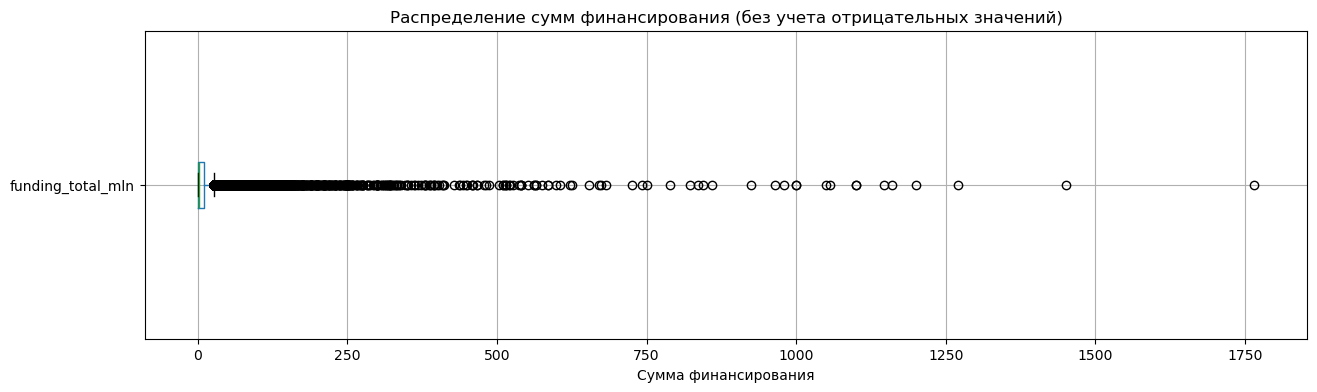

In [152]:
# убираем из расчетов отрицательные значения
new_df_plus = new_df_filtered[(new_df_filtered['funding_total_mln'] > 0)]

# Строим диаграмму размаха для наглядности
# Создаём фигуру графика
plt.figure(figsize=(15, 4))

# Строим диаграмму
boxplot = new_df_plus.boxplot(column = 'funding_total_mln', 
                    vert = False)

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Распределение сумм финансирования (без учета отрицательных значений)')
plt.xlabel('Сумма финансирования')

plt.show()

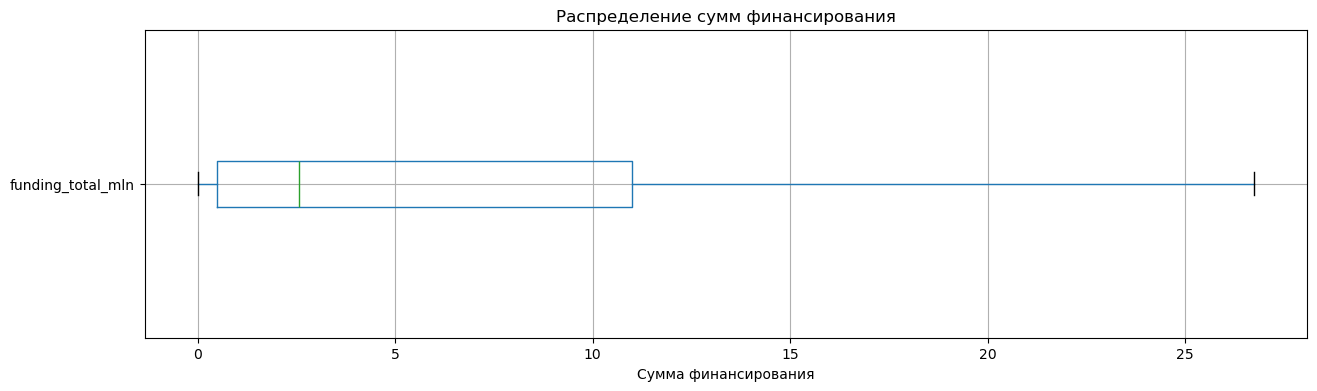

In [153]:
# Строим дополнительную диаграмму без выбросов
# Создаём фигуру графика
plt.figure(figsize=(15, 4))

# Строим диаграмму
boxplot = new_df_plus.boxplot(column = 'funding_total_mln', 
                    vert = False, showfliers = False)

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')

plt.show()

Дополним визуализацию диаграммой.

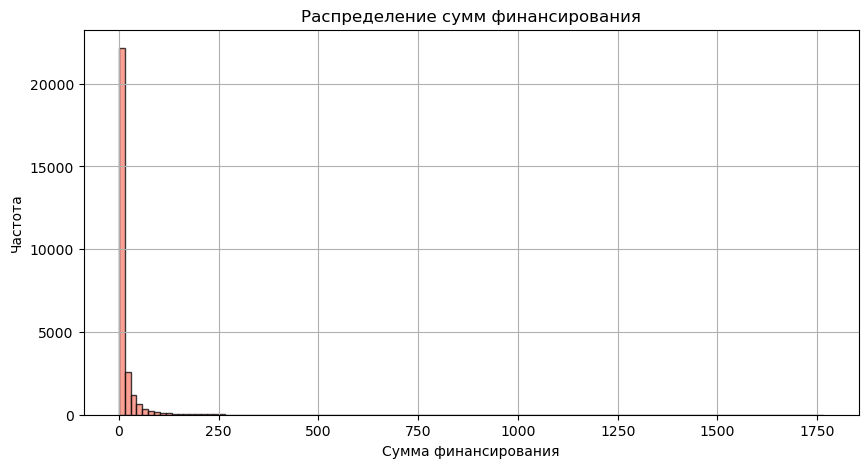

In [155]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим диаграмму
new_df_plus['funding_total_mln'].plot(kind='hist', 
                bins=120, 
                alpha=0.75,
                color='salmon',
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [156]:
new_df_plus['funding_total_mln'].describe()

count   27913.00
mean       14.23
std        47.09
min         0.00
25%         0.50
50%         2.57
75%        11.00
max      1765.50
Name: funding_total_mln, dtype: float64

In [157]:
# проверим максимальный размер финансирования
new_df_max = new_df_filtered[(new_df_filtered['funding_total_mln'] == 1765.50)]
display(len(new_df_max))
display(new_df_max.head())

1

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,funding_total_mln,price_amount_mln
13996,22568,Solyndra,manufacturing,operating,2005-01-01,NaT,solyndra.com,SolyndraCorp,USA,0,9,1765500000,3,NaN,NaN,NaN,NaN,NaN,NaT,1765.50,NaN


##### Из описания и визуализаций данных видно следующее:

- Типичный размер общего финансирования за исследуемый период (медиана) составил 2.57 млн. долларов.
- Минимальный размер финансирования (1й квартиль) = 500 тысяч долларов, максимальный - 1 миллиард 765.5 млн. долларов (компания Solyndra, производство цилиндрических солнечных панелей, проведено 9 раундов финансирования).
- Среднее значение общего финансирования существенно выше медианы и составляет 14.23 млн.долларов. Стандартное отклонение в данных также имеет высокое значение. Все это говорит о сильном разбросе данных и больших выбросах. Это же подтверждает и диаграмма размаха.
- Типичные суммы финансирования сосредоточены в диапазоне от 500 тыс. до 11 млн. долларов.




### 3.3. Куплены забесплатно?

Рассмотрим компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Возможные причины нулевой суммы продажи:

- Сделка публично не раскрывается.

- Данные ошибочны или отсутствуют.

- Компания является банкротом, происходит формальная продажа с целью закрытия долгов, продажи имущества и т.п.

- Покупается только команда, а не производимый продукт, и выплаты от продажи получают сами сотрудники в качестве гонораров.

- Слияние или поглощение другой компанией, формальная смена названия и переход на новое юридическое лицо.

Отфильтруем данные по заданным условиям:

In [160]:
new_df_all = new_df_filtered[new_df_filtered['price_amount'].notna()]

In [161]:
new_df_0 = new_df_all[(new_df_all['price_amount'] <= 1) & (new_df_all['funding_total'] > 0)]

In [162]:
display(len(new_df_0))

1617

In [163]:
new_df_0['company_id'].nunique()

1592

In [164]:
new_df_0['name'].value_counts(ascending = False)

name
Forrst                        3
Fleet Management Solutions    2
Wavemaker Software            2
Shelfari                      2
SocialPicks                   2
                             ..
SnapNames                     1
hi5                           1
Prenova                       1
TRIRIGA                       1
Yoke                          1
Name: count, Length: 1592, dtype: int64

In [165]:
# найдем долю нулевых сделок от общего числа сделок
share_null = len(new_df_0) / len(new_df_all)
display (f'Доля сделок за 0-1$ от общего числа сделок - {round(share_null, 3)}')

'Доля сделок за 0-1$ от общего числа сделок - 0.172'

По заданным условиям получилось 1617 сделок, в которых участвовали 1592 компании. Это составляет 17.2% от всех сделок по продаже стартапов. Некоторые компании меняли владельца 2-3 раза. 

Проанализируем типичные суммы финансирования для компаний, проданных за 0-1$.

In [167]:
new_df_0['funding_total_mln'].describe()

count   1617.00
mean      14.64
std       30.07
min        0.00
25%        2.00
50%        6.00
75%       15.50
max      395.00
Name: funding_total_mln, dtype: float64

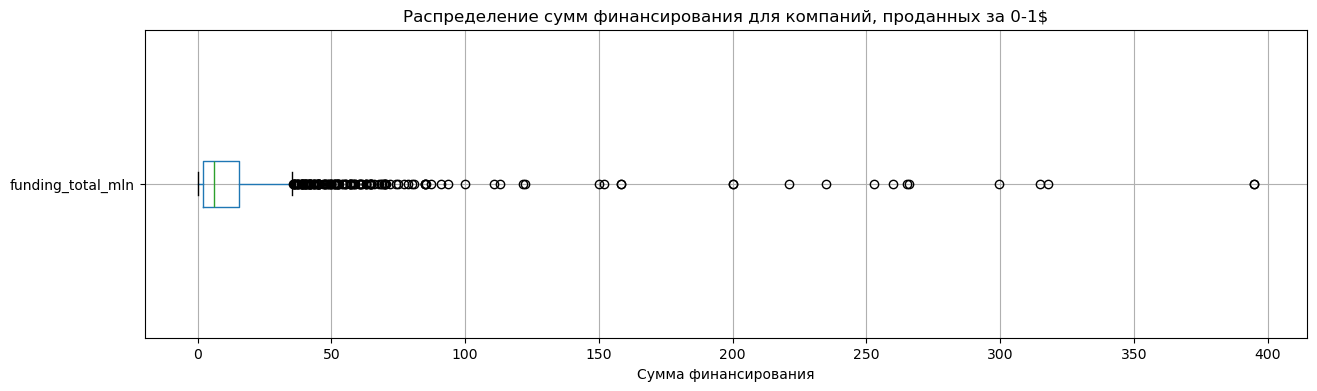

In [168]:
# Строим диаграмму размаха для наглядности
# Создаём фигуру графика
plt.figure(figsize=(15, 4))

# Строим диаграмму
boxplot = new_df_0.boxplot(column = 'funding_total_mln', 
                    vert = False)

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Распределение сумм финансирования для компаний, проданных за 0-1$')
plt.xlabel('Сумма финансирования')

plt.show()

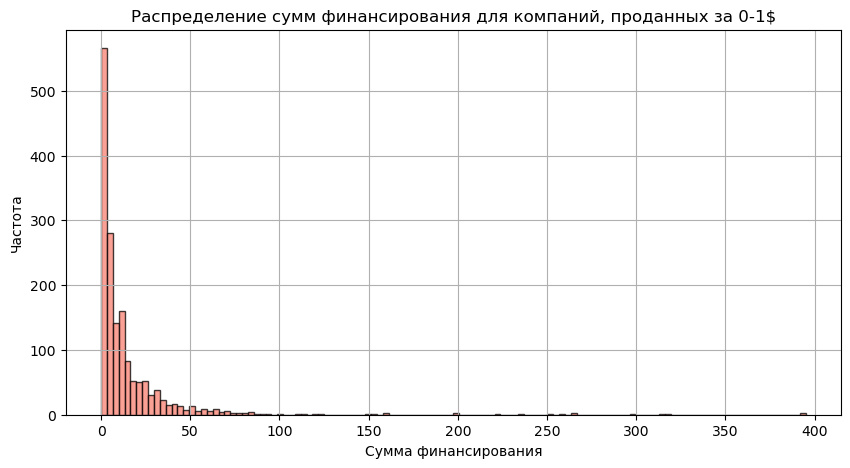

In [304]:
# Создаём контейнер для диаграммы
plt.figure(figsize=(10, 5))

# Строим диаграмму
new_df_0['funding_total_mln'].plot(kind='hist', 
                bins=120, 
                alpha=0.75,
                color='salmon',
                edgecolor='black',
                rot=0)

# Настраиваем оформление графика
plt.title('Распределение сумм финансирования для компаний, проданных за 0-1$')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')
plt.grid()


# Выводим график
plt.show()

Рассчитаем межквартильный размах и найдем верхний и нижний пороги для выбросов.

In [171]:
q1 = new_df_0['funding_total_mln'].quantile(0.25)
q2 = new_df_0['funding_total_mln'].quantile(0.5)
q3 = new_df_0['funding_total_mln'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

display(f'Q1 (25-й перцентиль): {q1} млн.$')
display(f'Медиана: {q2} млн.$')
display(f'Q3 (75-й перцентиль): {q3} млн.$')
display(f'IQR: {iqr}')
display(f'Нижняя граница выбросов: {lower_bound} млн.$')
display(f'Верхняя граница выбросов: {upper_bound} млн.$')

'Q1 (25-й перцентиль): 2.0 млн.$'

'Медиана: 6.0 млн.$'

'Q3 (75-й перцентиль): 15.5 млн.$'

'IQR: 13.5'

'Нижняя граница выбросов: -18.25 млн.$'

'Верхняя граница выбросов: 35.75 млн.$'

Нижняя граница выбросов получись отрицательным значением, т.к. распределение сумм финансирования скошено в сторону малых чисел, 25% значений - менее 2 млн.долларов. Отрицательных сумм финансирования быть не может, соответственно выбросами можно считать суммы, превышающие 35.75 млн.долларов, а нижнюю границу приравнять к 0.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Типично высокую цену можно вычислить при расчете медианы, а значительный разброс цен показывает межквартильный размах IQR. 

Сгруппируем данные по категориям стартапов и рассчитаем необходимые характеристики, включая количество компаний, представленных в каждой категории.

In [174]:
category_stats = new_df_filtered.groupby('category_code')['price_amount_mln'].agg(
    median_price = 'median',
    count_companies = 'count')

category_stats =category_stats.sort_values(by='median_price', ascending=False)

# Добавим столбец с расчетом межквартильного размаха
category_stats['iqr'] = new_df_filtered.groupby('category_code', observed=False)['price_amount_mln'].quantile(0.75) - new_df_filtered.groupby('category_code', observed=False)['price_amount_mln'].quantile(0.25)

# Отфильтруем категории с количеством компаний >=5
category_stats = category_stats[category_stats['count_companies'] >= 5]

# выведем ТОП-5 категорий 
top_categories = category_stats.sort_values(by=['median_price', 'iqr'], ascending=[False, False]).reset_index().head(5)
top_categories.index += 1
display(top_categories)


,category_code,median_price,count_companies,iqr
1,manufacturing,72.00,29,615.00
2,real_estate,50.00,7,903.50
3,automotive,43.00,5,2400.00
4,biotech,13.20,454,250.00
5,hospitality,12.50,11,118.75


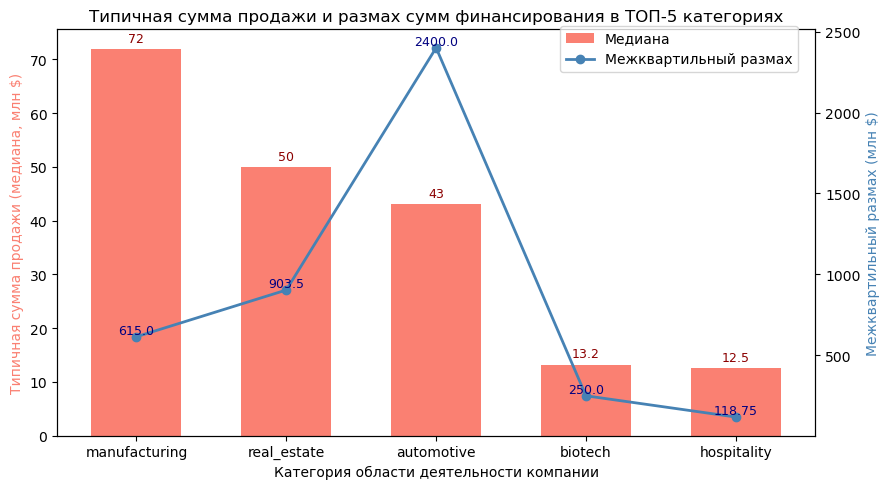

In [300]:
# создаём фигуру и оси
fig, ax1 = plt.subplots(figsize=(9, 5))

# столбчатая диаграмма
bars = ax1.bar(top_categories['category_code'],
    top_categories['median_price'],
    color='salmon',
    label='Медиана',
    width=0.6)

ax1.set_xlabel('Категория области деятельности компании')
ax1.set_ylabel('Типичная сумма продажи (медиана, млн $)', color='salmon')
ax1.set_title('Типичная сумма продажи и размах сумм финансирования в ТОП-5 категориях')

# Добавим подписи над столбиками
for container in ax1.containers:
    ax1.bar_label(container, fontsize=9, padding=3, color='darkred')
    
# Вторая ось Y — линейный график
ax2 = ax1.twinx()
line = ax2.plot(top_categories['category_code'],
    top_categories['iqr'],
    color='steelblue',
    marker='o',
    linewidth=2,
    label='Межквартильный размах')

ax2.set_ylabel('Межквартильный размах (млн $)', color='steelblue')

top_categories['iqr'] = round(top_categories['iqr'],2)
# Добавим подписи к точкам линии
for x, y in zip(top_categories['category_code'], top_categories['iqr']):
    ax2.text(x, y, f'{y}', fontsize=9, color='navy', ha='center', verticalalignment='bottom')

# Общая легенда
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.95))

plt.tight_layout()
plt.show()

Таким образом, самые высокие типичные цены стартапов - среди производств (manufacturing), медиана цен - 72 млн.долларов. Самый большой разброс цен - среди компаний, работающих в автомобильной отрасли (IQR = 2400 млн.долларов). Наибольшее число стартапов  из ТОП-5 привлекательных для крупных инвесторов представлено в категории биотехнологий. Типичная цена стартапа здесь равна 13.2 млн.долларов, межквартильный размах - 250 млн.долларов.


### 3.5. Сколько раундов продержится стартап перед покупкой

Проанализируем значения столбца `funding_rounds`, чтобы определить типичное значение количества раундов для каждого возможного статуса стартапа.

Для анализа будем использовать датафрейм `new_df_filtered`. Рассмотрим общие статистические показатели столбца `funding_rounds`.

In [178]:
new_df_filtered['funding_rounds'].describe()

count   40890.00
mean        1.29
std         1.26
min         0.00
25%         1.00
50%         1.00
75%         2.00
max        15.00
Name: funding_rounds, dtype: float64

Минимальное число раундов финансирования = 0, максимальное = 15. При этом медиана значений соответствует 1, и среднее значение чуть выше медианы (1.29), что говорит о существующих выбросах. Стандартное отклонение небольшое, 1.26, это означает, что большинство значение сосредоточено около 1.

Проверим типичное количество раундов финансирования для каждого статуса компаний.

In [180]:
status_stats = new_df_filtered.groupby('status')['funding_rounds'].agg(
    median_rounds = 'median',
    mean_rounds = 'mean')

status_stats =status_stats.sort_values(by='median_rounds', ascending=False)

display(status_stats)

,median_rounds,mean_rounds
status,,
closed,1.00,1.38
ipo,1.00,1.93
operating,1.00,1.52
acquired,0.00,0.53


Медианное количество раундов для каждой категории = 1, среднее варьируется от 0.53 до 1.93. Построим диаграммы размаха для каждой категории, чтобы увидеть распределение данных.

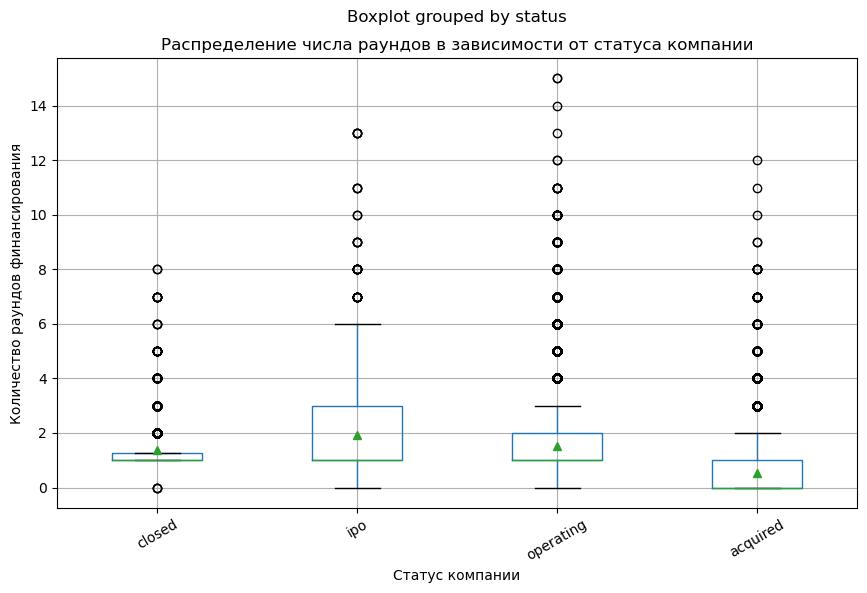

In [182]:
# Вычисление медианы для каждой категории
medians = new_df_filtered.groupby('status')['funding_rounds'].median().sort_values(ascending=False)

# Сортировка по медиане
sorted_status = medians.index
new_df_filtered['status'] = pd.Categorical(new_df_filtered['status'], categories=sorted_status, ordered=True)

new_df_filtered.boxplot(column='funding_rounds', 
             by='status', 
             grid=True,       
             showmeans=True,  # укажем среднее значение (треугольники) 
             figsize=(10, 6))

# Добавлем заголовок и метки осей
plt.title('Распределение числа раундов в зависимости от статуса компании')
plt.xlabel('Статус компании')
plt.ylabel('Количество раундов финансирования')

plt.xticks(rotation = 30)  
plt.show()                

Максимальное число раундов финансирования:
- среди закрытых компаний - 8,
- среди компаний, вышедших на IPO - 13,
- среди компаний, продолжающих свою работу - 15
- среди проданных/поглощенных - 12 раундов.

Однако, это количество раундов относится к числу аномалий. Добавим к расчетам верхний порог выбросов и межквартильный размах:

In [184]:
status_stats['iqr'] = new_df_filtered.groupby('status', observed=False)['funding_rounds'].quantile(0.75) - new_df_filtered.groupby('status', observed=False)['funding_rounds'].quantile(0.25)
status_stats['upper_bound'] = new_df_filtered.groupby('status', observed=False)['funding_rounds'].quantile(0.75) + (1.5 * status_stats['iqr'])

display(status_stats)

,median_rounds,mean_rounds,iqr,upper_bound
status,,,,
closed,1.00,1.38,0.25,1.62
ipo,1.00,1.93,2.00,6.00
operating,1.00,1.52,1.00,3.50
acquired,0.00,0.53,1.00,2.50


Таким образом, самое большое число раундов финансирования, без учета аномальных значений - 6 раундов, и оно присуще компаниям, вышедшим на IPO.

Также стоит отдельно отметить, что компании со статусом `acquired` имеют все статистические показатели на минимальном уровне. Медиана = 0 (т.е. половина компаний вообще не имела внешнего финансирования), средее = 0.53, верхняя граница максимума без учета аномалий - 2.5, межквартильный размах =1. Это может тем, что компании могли приобретаться на ранних этапах, до привлечения внешних инвестиций, в том числе могли приобретаться идеи, технологии или команды стартапа.


## Шаг 4. Итоговый вывод и рекомендации

В ходе исследования были проанализированы 7 датасетов (5 основных и 2 дополнительных), содержащих информацию о стартапах в период с 1999 по 2013 годы. Данные включали информацию о компаниях-стартапах, количестве раундов финансирования, суммах финансирования, информацию о продаже компаний и инвестиционных фондах. Акцент исследования был сделан на предобработку с целью упростить дальнейшие исследования данной информации, а также на анализ типичного размера финансирования компаний и типичного количества раундов финансирования.

### 4.1. Общая информация о проведенном исследовании.

В результате предобработки данных и предварительного анализа была обработана информация 5 основных датасетов:

- все названия столбцов приведены к единому стилю написания;
- обработаны типы данных (столбцы с датами приведены к типу datetime64), проанализированы пропуски. В ходе анализа пропусков выявлено, что датасет `company_and_rounds` является объединенным, хранит информацию из двух датасетов (общая информация о компании и информация о проведенных раундах финансирования);
- проанализированы раунды и типичные суммы финансирования по годам, выявлено, что максимальный размер финансирования в рамках одного раунда был в 2005 году и составлял 5.5 млн.долларов. При этом начиная с 2005 года число стартапов растет, а сумма финансирования в 1 раунде - снижается до 1 млн.долларов за раунд.
- объединены датасеты `people`, `education` и `degrees` для дальнейших исследований уровня образования сотрудников стартапов. Проверена гипотеза о том, что чем больше компания, тем больше информации о ней внесено в данные (на примере данных об образовании сотрудников). Доля сотрудников, по которым отсутствует информация об образовании, снижается с ростом численности в компании.
- проанализированы столбцы с одинаковым названием `network_username`в трех датасетах (`company_and_rounds`, `people` и `fund`), выявлено малое количество пересечение, и, как следствие, невозможность использования их в качестве основных ключей при объединении таблиц.
- датасет `company_and_rounds` для удобства дальнейшей работы разделен на 2 таблицы - с информацией о компаниях-стартапах и с информацией о раундах инвестирования. Очищены от дубликатов и пропусков, где было возможно.
- таблица с информацией о компании отфильтрована по параметрам заказчика, оставлены компании, которые меняли или готовы менять владельцев (наличие внешнего финансирования), и объединена с данными о продаже компаний.

### 4.2. Анализ финансирования компаний-стартапов.

В ходе анализа финансирования компаний-стартапов было выявлено:

- Типичный размер общего финансирования за исследуемый период (медиана) составил 2.57 млн. долларов. Минимальный размер финансирования (1й квартиль) = 500 тысяч долларов, максимальный - 1 миллиард 765.5 млн. долларов.
- 17.2% сделок по продаже компаний стартапов прошли с нулевой (или близкой к нулю) суммой. Тем не менее, данные компании имели финансирование, медиана сумм финансирования составила 6 млн.долларов. Верхняя граница выбросов - 35.75 млн.долларов.
- самые высокие типичные цены стартапов - среди производств, медиана цен - 72 млн.долларов. Самый большой разброс цен - среди компаний, работающих в автомобильной отрасли (IQR = 2400 млн.долларов и медиана - 43 млн.долларов).
- типичное число раундов финансирования для компаний всех статусов (медиана) - 1. Компании, вышедшие на IPO, демонстрируют наибольшую вариативность в количестве раундов финансирования (межквартильный размах = 2), а их максимальное число раундов (без учета выбросов) достигает 6.
- компании, имеющие статус `acquired` демонстрируют самые низкие значения по всем ключевым статистическим метрикам. Половина из них не привлекала инвестиции (медиана = 0), что может свидетельствовать о приобретении таких компаний на ранних стадиях — ради их технологий, команд или идей.

### 4.3. Рекомендации

- При дальнейшем анализе следует учитывать, что при объединении таблиц столбцы `network_username` не подходят в качестве основного ключа из-за низкого уровня пересечений, необходимо ориентироваться на ID компаний.
- При выборе компаний для финансирования, следует обратить внимание, что стартапы с высокой вероятностью выхода на IPO проходят больше раундов финансирования, но медианное число раундов невелико (1-2).
- Дополнительно можно провести более глубокое исследование категорий компаний с целью выявить различия в финансировании между отраслями (какие суммы привлекаются, сколько раундов инвестирования проходят компании).
- Также можно дополнительно проанализировать, стартапы каких индустрий чаще продаются, чаще выходят на IPO).
- В ходе исследования не были затронуты таблицы `fund` и `investment`, их дальнейший анализ позволит ответить на вопросы об особенностях инвестирования (какой тип финансирования используют фонды, в скольки раундах инвестирования участвуют, какие отрасли выбираются для инвестиций (есть ли некая специализация у фондов) и т.п.)